# Review of Experimental Results for L8

In [1]:
import numpy as np
import pandas as pd
import math
import joblib
import optuna
from os import path
import matplotlib.pyplot as plt
from ESN import ESN as esn
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse

In [58]:
df = pd.read_excel('Architecture.xlsx').iloc[:,0]

 
studies = pd.DataFrame([
    ["study_1469", joblib.load('L8-experiment-' + str(df[0]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[0]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[0]) + ".pkl").best_trials], 
    ["study_146A", joblib.load('L8-experiment-' + str(df[1]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[1]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[1]) + ".pkl").best_trials], 
    ["study_146B", joblib.load('L8-experiment-' + str(df[2]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[2]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[2]) + ".pkl").best_trials], 
    ["study_1479", joblib.load('L8-experiment-' + str(df[3]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[3]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[3]) + ".pkl").best_trials], 
    ["study_147A", joblib.load('L8-experiment-' + str(df[4]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[4]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[4]) + ".pkl").best_trials], 
    ["study_147B", joblib.load('L8-experiment-' + str(df[5]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[5]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[5]) + ".pkl").best_trials], 
    ["study_1569", joblib.load('L8-experiment-' + str(df[6]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[6]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[6]) + ".pkl").best_trials], 
    ["study_156A", joblib.load('L8-experiment-' + str(df[7]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[7]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[7]) + ".pkl").best_trials], 
    ["study_156B", joblib.load('L8-experiment-' + str(df[8]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[8]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[8]) + ".pkl").best_trials], 
    ["study_1579", joblib.load('L8-experiment-' + str(df[9]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[9]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[9]) + ".pkl").best_trials], 
    ["study_157A", joblib.load('L8-experiment-' + str(df[10]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[10]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[10]) + ".pkl").best_trials],
    ["study_157B", joblib.load('L8-experiment-' + str(df[11]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[11]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[11]) + ".pkl").best_trials],
    ["study_2469", joblib.load('L8-experiment-' + str(df[12]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[12]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[12]) + ".pkl").best_trials],
    ["study_246A", joblib.load('L8-experiment-' + str(df[13]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[13]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[13]) + ".pkl").best_trials],
    ["study_246B", joblib.load('L8-experiment-' + str(df[14]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[14]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[14]) + ".pkl").best_trials],
    ["study_2479", joblib.load('L8-experiment-' + str(df[15]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[15]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[15]) + ".pkl").best_trials],
    ["study_247A", joblib.load('L8-experiment-' + str(df[16]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[16]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[16]) + ".pkl").best_trials],
    ["study_247B", joblib.load('L8-experiment-' + str(df[17]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[17]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[17]) + ".pkl").best_trials],
    ["study_2569", joblib.load('L8-experiment-' + str(df[18]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[18]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[18]) + ".pkl").best_trials],
    ["study_256A", joblib.load('L8-experiment-' + str(df[19]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[19]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[19]) + ".pkl").best_trials],
    ["study_256B", joblib.load('L8-experiment-' + str(df[20]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[20]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[20]) + ".pkl").best_trials],
    ["study_2579", joblib.load('L8-experiment-' + str(df[21]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[21]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[21]) + ".pkl").best_trials],
    ["study_257A", joblib.load('L8-experiment-' + str(df[22]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[22]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[22]) + ".pkl").best_trials],
    ["study_257B", joblib.load('L8-experiment-' + str(df[23]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[23]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[23]) + ".pkl").best_trials],
    ["study_3469", joblib.load('L8-experiment-' + str(df[24]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[24]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[24]) + ".pkl").best_trials],
    ["study_346A", joblib.load('L8-experiment-' + str(df[25]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[25]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[25]) + ".pkl").best_trials],
    ["study_346B", joblib.load('L8-experiment-' + str(df[26]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[26]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[26]) + ".pkl").best_trials],
    ["study_3479", joblib.load('L8-experiment-' + str(df[27]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[27]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[27]) + ".pkl").best_trials],
    ["study_347A", joblib.load('L8-experiment-' + str(df[28]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[28]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[28]) + ".pkl").best_trials],
    ["study_347B", joblib.load('L8-experiment-' + str(df[29]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[29]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[29]) + ".pkl").best_trials],
    ["study_3569", joblib.load('L8-experiment-' + str(df[30]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[30]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[30]) + ".pkl").best_trials],
    ["study_356A", joblib.load('L8-experiment-' + str(df[31]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[31]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[31]) + ".pkl").best_trials],
    ["study_356B", joblib.load('L8-experiment-' + str(df[32]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[32]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[32]) + ".pkl").best_trials],
    ["study_3579", joblib.load('L8-experiment-' + str(df[33]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[33]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[33]) + ".pkl").best_trials],
    ["study_357A", joblib.load('L8-experiment-' + str(df[34]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[34]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[34]) + ".pkl").best_trials],
    ["study_357B", joblib.load('L8-experiment-' + str(df[35]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[35]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[35]) + ".pkl").best_trials],
    ["study_8469", joblib.load('L8-experiment-' + str(df[36]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[36]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[36]) + ".pkl").best_trials],
    ["study_846A", joblib.load('L8-experiment-' + str(df[37]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[37]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[37]) + ".pkl").best_trials],
    ["study_846B", joblib.load('L8-experiment-' + str(df[38]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[38]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[38]) + ".pkl").best_trials],
    ["study_8479", joblib.load('L8-experiment-' + str(df[39]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[39]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[39]) + ".pkl").best_trials],
    ["study_847A", joblib.load('L8-experiment-' + str(df[40]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[40]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[40]) + ".pkl").best_trials],
    ["study_847B", joblib.load('L8-experiment-' + str(df[41]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[41]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[41]) + ".pkl").best_trials],
    ["study_8569", joblib.load('L8-experiment-' + str(df[42]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[42]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[42]) + ".pkl").best_trials],
    ["study_856A", joblib.load('L8-experiment-' + str(df[43]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[43]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[43]) + ".pkl").best_trials],
    ["study_856B", joblib.load('L8-experiment-' + str(df[44]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[44]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[44]) + ".pkl").best_trials],
    ["study_8579", joblib.load('L8-experiment-' + str(df[45]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[45]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[45]) + ".pkl").best_trials],
    ["study_857A", joblib.load('L8-experiment-' + str(df[46]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[46]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[46]) + ".pkl").best_trials],
    ["study_857B", joblib.load('L8-experiment-' + str(df[47]) + ".pkl").best_value, joblib.load('L8-experiment-' + str(df[47]) + ".pkl").best_trial, joblib.load('L8-experiment-' + str(df[47]) + ".pkl").best_trials]])



In [59]:
studies = studies.sort_values(by=1)
studies.head(20)

,0,1,2,3
38,study_846B,0.012605,"FrozenTrial(number=111, values=[0.012605235071...","[FrozenTrial(number=111, values=[0.01260523507..."
37,study_846A,0.013146,"FrozenTrial(number=133, values=[0.013146036295...","[FrozenTrial(number=133, values=[0.01314603629..."
13,study_246A,0.020590,"FrozenTrial(number=121, values=[0.020590459974...","[FrozenTrial(number=121, values=[0.02059045997..."
12,study_2469,0.024527,"FrozenTrial(number=123, values=[0.024526512016...","[FrozenTrial(number=123, values=[0.02452651201..."
44,study_856B,0.024618,"FrozenTrial(number=141, values=[0.024617941365...","[FrozenTrial(number=141, values=[0.02461794136..."
43,study_856A,0.029816,"FrozenTrial(number=55, values=[0.0298157521923...","[FrozenTrial(number=55, values=[0.029815752192..."
42,study_8569,0.030533,"FrozenTrial(number=137, values=[0.030533030493...","[FrozenTrial(number=137, values=[0.03053303049..."
36,study_8469,0.031573,"FrozenTrial(number=136, values=[0.031573303261...","[FrozenTrial(number=136, values=[0.03157330326..."
14,study_246B,0.035641,"FrozenTrial(number=145, values=[0.035641330651...","[FrozenTrial(number=145, values=[0.03564133065..."
25,study_346A,0.045138,"FrozenTrial(number=68, values=[0.0451384873114...","[FrozenTrial(number=68, values=[0.045138487311..."


## Confirm Trial Results
Make sure the above results can be duplicated

In [8]:
def getScores(actual, predicted): 
    np.seterr(all='raise')
    try:
        mse0 = mse(actual, predicted)
        rmse = math.sqrt(mse0)
        nmrse = rmse / np.var(actual)
        
        mae0 = mae(actual, predicted)
        
        r20 = r2(actual, predicted)
        
    except FloatingPointError:
        print('Exceptionally bad generation of ESN. Aborting sub-trial. (1)')
        nmrse = 100
        mae0 = 100
        r20 = 0

    np.seterr(all='warn')
    return nmrse, mae0, r20

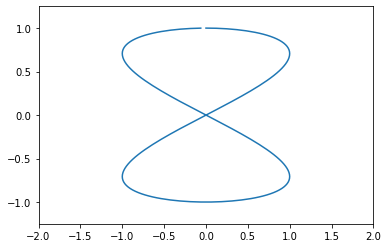

In [9]:
#Generate Figure 8 Data
t_all = np.linspace(0, 2*(23000/200), 23000)
t = t_all[0:3000]
t_val = t_all[3000:]
omega = 1

x = np.sin(2*math.pi*omega*t)
x = x.reshape(-1,1)
x_val = np.sin(2*math.pi*omega*t_val)
x_val = x_val.reshape(-1,1)

y = np.cos(math.pi*omega*t)
y = y.reshape(-1,1)
y_val = np.cos(math.pi*omega*t_val)
y_val = y_val.reshape(-1,1)

plt.plot(x[0:200], y[0:200])
plt.ylim(-1.25, 1.25)
plt.xlim(-2,2)
plt.show()

data = np.column_stack((x,y))
dataval = np.column_stack((x_val,y_val))

### General Parameters

In [10]:
np.random.seed(0)
K = 0
L = 2
N = 20
v = np.random.uniform(-0.01,0.01,(20000, 20))
sv = 0
outAlg = 1 
isBias = True
isClassification = False

In [20]:
# Parameters (to tune)
#N = trial.suggest_int('N', 10,100) For Jaeger et al's work we know 20 neurons was sufficient and we can always scale up
for i in range(0,1):
    p = studies.iloc[i,2].params['p']
    a = studies.iloc[i,2].params['a']
    dw = studies.iloc[i,2].params['dw']
    dfb = studies.iloc[i,2].params['dfb']
    din = studies.iloc[i,2].params['din']
    sin = studies.iloc[i,2].params['sin']
    sfb = studies.iloc[i,2].params['sfb']
    B = studies.iloc[i,2].params['B']
    isU2Y = studies.iloc[i,2].user_attrs['isU2Y']
    isY2Y = studies.iloc[i,2].user_attrs['isY2Y']
    resFunc = studies.iloc[i,2].user_attrs['resFunc']
    outFunc = studies.iloc[i,2].user_attrs['outFunc']
    distribution = studies.iloc[i,2].user_attrs['distribution']

    model = esn(K = K,
                L = L,
                N = N,
                p = p,
                a = a,
                v = v,
                dw = dw,
                din = din,
                dfb = dfb,
                sin = sin,
                sfb = sfb,
                sv = sv,
                resFunc = resFunc,
                outFunc = outFunc,
                outAlg = outAlg,
                B = B,
                distribution = distribution,
                isBias = isBias,
                isU2Y = isU2Y,
                isY2Y = isY2Y,
                isClassification = isClassification)

    seed = studies.iloc[i,2].user_attrs['seed']
    washout = 1000
    model.sv = 0
    model.generateW(seed)
    model.generateWin(seed)
    model.generateWfb(seed)

    model.train(input_u = None, teacher=data, washout=washout)
    model.sv = 1
    predicted = model.run(input_u=None, time=20000,washout=1000)

    nrmse0, mae0, r20 = getScores(dataval[1000:], predicted)
    print(studies.iloc[i,0])
    print("NRMSE: " + str(studies.iloc[i,2].user_attrs['NRMSE']) + ", " + str(nrmse0))
    print("MAE: " + str(studies.iloc[i,2].user_attrs['MAE']) + ", " + str(mae0))
    print("R2: " + str(studies.iloc[i,2].user_attrs['R2']) + ", " + str(r20) + "\n")

study_1469
NRMSE: 0.17320343301332428, 0.17320343301332428
MAE: 0.06588730985990865, 0.06588730985990865
R2: 0.9849998784253045, 0.9849998784253045



In [17]:
df = pd.read_excel('Architecture.xlsx').iloc[:,0]
studies = pd.DataFrame(np.zeros((1,3)))
studies.iloc[0,0]="study_1469"
studies.iloc[0,1] = joblib.load('L8-experiment-' + str(df[0]) + ".pkl").best_value
studies.iloc[0,2] = joblib.load('L8-experiment-' + str(df[0]) + ".pkl").best_trial

In [18]:
studies.iloc[0,2].params

{'p': 0.6932860140171225,
 'a': 0.05517163043510427,
 'dw': 0.4189082823463225,
 'dfb': 0.6849331528677385,
 'din': 0.7071804632045449,
 'sin': 0.17388786837683856,
 'sfb': 1.646441508427919,
 'B': 0.0302959359429321}